# Aula 23 - Introdução a Lógica Difusa

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# funções de pertinência
# f(x) = p*x    -> p = 1/(b-a)
## triangular
def trimf(x, a, b, c):
  x = np.asarray(x, dtype=float)
  esquerda= (x -a)/ (b - a + 0.0000000001 )   # 180
  direita = (c - x)/ ( c - b +1e-10 )    # -10
  return np.maximum( 0, np.minimum(esquerda,direita))

## trapezoidal
def trapmf(x, a, b, c, d):
  x = np.asarray(x, dtype=float)

# 1 constante em zero
#  2 constante em 1
# 3

  subida = (x - a)/ (b - a + 1e-10) # coeficiente angular 1/(b-a)
# 4

  descida = (d - x)/ (d - c + 1e-10) # coeficiente angular -1/(d-c)

  return np.maximum( 0 ,  np.minimum(    np.minimum(  subida , descida )   ,   1)   )

def plot_mf(universo, mfs: dict, title="Funções de pertinencia"):
  plt.figure(figsize=(6,3))
  for name, mf in mfs.items():
    plt.plot(universo, mf, label=name)

  plt.ylim(-0.05, 1.05)
  plt.title(title)
  plt.xlabel("Universo")
  plt.ylabel("μ")
  plt.legend()
  plt.grid(alpha=0.25)
  plt.show()

def centroid(x, mu):
  x= np.asarray(x, dtype=float)
  mu= np.asarray(mu, dtype=float)

  num = np.trapezoid(x*mu, x)

  den= np.trapezoid(mu, x)
  return num/den




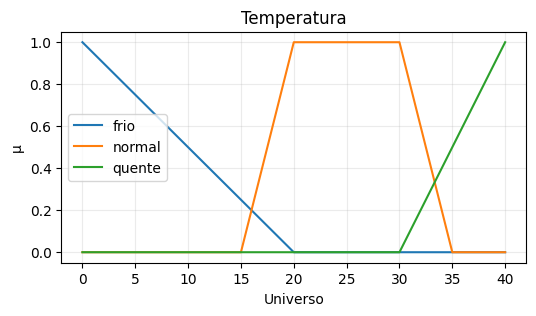

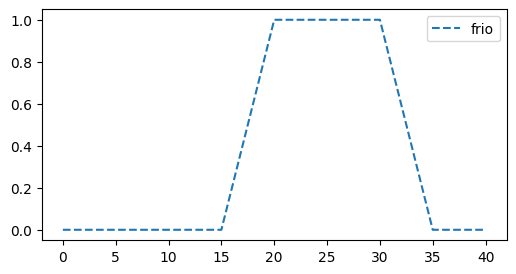

In [18]:

#universo de discurso
T = np.linspace(0,40,401)

#funções de pertinência
mfs_T = {
    'frio': trimf(T, -10, 00, 20),
    'normal': trapmf(T, 15, 20, 30, 35),
    'quente': trimf(T, 30, 40, 46)
}

plot_mf(T, mfs_T, "Temperatura")

plt.figure(figsize=(6,3))
plt.plot(T, mfs_T['normal'],'--', label="normal")

plt.legend()

In [19]:
Tx=32.77321
# grau de pertinência de Tx
mu = {k: np.interp(Tx, T, v) for k, v in mfs_T.items()}
mu

{'frio': np.float64(0.0),
 'normal': np.float64(0.4453579999910931),
 'quente': np.float64(0.2773209999972267)}

Se setiver quente -> potência alta
se estiver normal -> potência media
se estiver frio -> baixa




In [20]:
#força de resposta
disparo = {         # para 39
    'baixa': mu['frio'],  # 0
    'média': mu['normal'], # 0
    'alta': mu['quente']  # .9
}

#se quente -> potencia alta

#sugeno
const = {"baixa": 20, "média": 50, "alta": 100}

forca = sum([const[k] * v for k, v in disparo.items()])  # ubaixo= 0 unormal= 0.445
                                                          #uquente= 0.27
#   frio        normal          quente
# 20* 0         50*0.445        100*0.27

forca

np.float64(49.99999999927732)

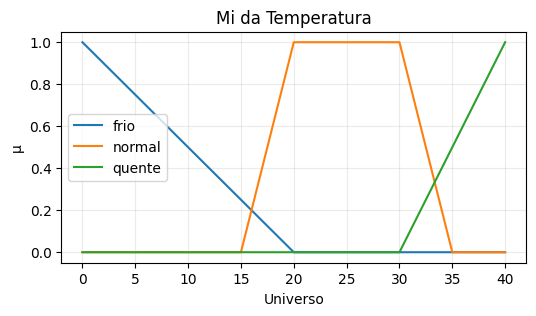

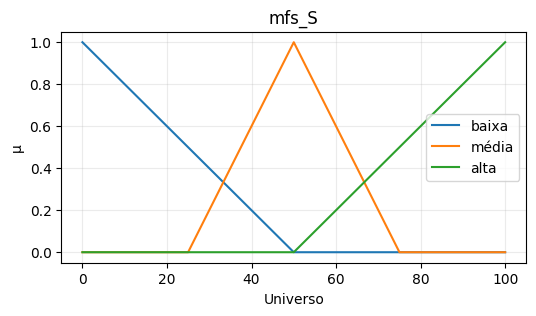

{'frio': np.float64(0.14999999999925),
 'normal': np.float64(0.399999999992),
 'quente': np.float64(0.0)}

In [21]:
# universo da resposta
#const = {"baixa": 20, "média": 50, "alta": 100}
S = np.linspace(0,100,401)

mfs_S = {       # const = {"baixa": 20, "média": 50, "alta": 100}
    'baixa': trimf(S, -10, 0, 50),
    'média': trimf(S, 25, 50, 75),
    'alta': trapmf(S, 50, 100, 151, 200)
}
plot_mf(T, mfs_T, "Mi da Temperatura")
plot_mf(S, mfs_S, "mfs_S")

T0 = 17
mu = {k: np.interp(T0, T, v) for k, v in mfs_T.items()}
mu

{'frio': np.float64(0.0), 'normal': np.float64(0.4439999999911198), 'quente': np.float64(0.27799999999722014)}
61.217768910897256


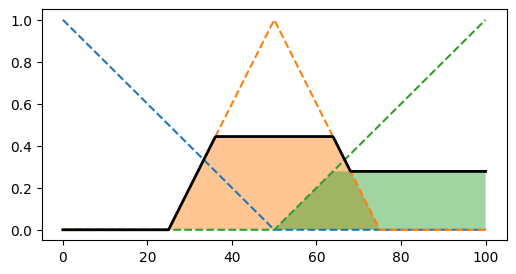

In [24]:
T0 = 32.78
mu = {k: np.interp(T0, T, v) for k, v in mfs_T.items()}
print(mu)
alpha_baixa = mu['frio']
alpha_média = mu['normal']
alpha_alta = mu['quente']

# regiao da resposta limitada pela pertinencia mfs_T
clipped_baixa = np.minimum(mu['frio'], mfs_S['baixa'])
clipped_média = np.minimum(mu['normal'], mfs_S['média'])
clipped_alta = np.minimum( mu['quente'], mfs_S['alta'])

# limite superior do agregado das regiões
agg = np.maximum(  np.maximum(clipped_baixa, clipped_média),   clipped_alta)

plt.figure(figsize=(6,3))
plt.plot(S, mfs_S['baixa'],'--', label="baixa")
plt.plot(S, mfs_S['média'],'--', label="média")
plt.plot(S, mfs_S['alta'],'--', label="alta")

plt.fill_between(S, clipped_baixa,  alpha=0.45)
plt.fill_between(S, clipped_média,  alpha=0.45)
plt.fill_between(S, clipped_alta,  alpha=0.45)

plt.plot(S, agg, 'k' , lw=2, label="agg")

#mamdani
print(centroid(S, agg))

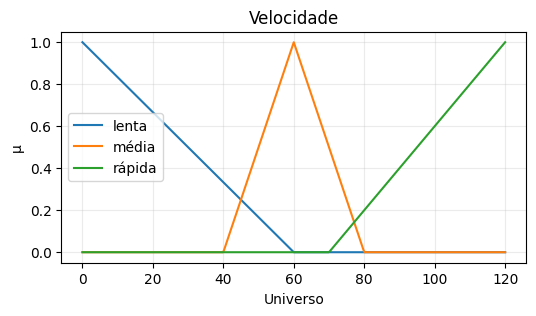

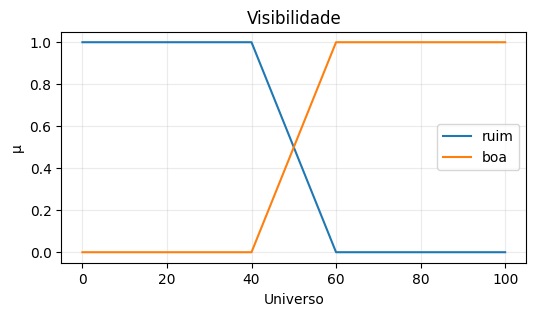

In [ ]:

velocidade = np.linspace(0,120,401)

visibilidade = np.linspace(0,100,401)

risco = np.linspace(0,100,401)

mfs_vel = {
    'lenta': trimf(velocidade, -10, 0, 60),
    'média': trimf(velocidade, 40, 60, 80),
    'rápida': trimf(velocidade, 70, 120, 140)
}

mfs_vis = {"ruim": trapmf(visibilidade, -10, -5, 40, 60),
           "boa": trapmf(visibilidade, 40,60,120,120 )}

plot_mf(velocidade, mfs_vel, "Velocidade")
plot_mf(visibilidade, mfs_vis, "Visibilidade")

In [ ]:
mfs_risco = {"baixo": trimf(risco, -1, 0, 50 ),
             "médio": trimf(risco, 25,50,75),
             "alto": trimf(risco, 50, 100, 101)}
plot_mf(velocidade, mfs_vel, "Velocidade")
plot_mf(visibilidade, mfs_vis, "Visibilidade")
plot_mf(risco, mfs_risco, "Risco")



In [ ]:
v0 = 75
vis0=50

mu_v = {k: np.interp(v0, velocidade, v) for k, v in mfs_vel.items()}
mu_vis = {k: np.interp(vis0, visibilidade, v) for k, v in mfs_vis.items()}

print(mu_v)
print(mu_vis)

{'lenta': np.float64(0.0), 'média': np.float64(0.24999999999875003), 'rápida': np.float64(0.0999999999998)}
{'ruim': np.float64(0.49999999999750006), 'boa': np.float64(0.49999999999750006)}


In [ ]:
alpha0 = min(mu_v['rápida'], mu_vis['boa'])
alpha1 = min(mu_v['rápida'], mu_vis['ruim'])
alpha2 = min(mu_v['média'], mu_vis['boa'])
print(alpha0)
print(alpha1)
print(alpha2)

0.0999999999998
0.0999999999998
0.24999999999875003


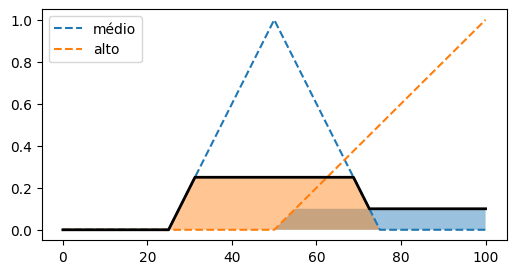

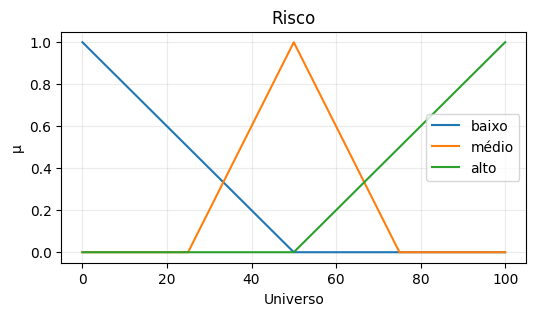

57.135253456238


In [ ]:
clipped_r_alto = np.minimum(mfs_risco['alto'], alpha1)
clipped_r_médio = np.minimum(mfs_risco['médio'], alpha2)

plt.figure(figsize=(6,3))
plt.ylim(-0.05,1.05);
plt.fill_between(risco, 0, clipped_r_alto, alpha=0.45)
plt.fill_between(risco, 0, clipped_r_médio, alpha=0.45)
plt.plot(risco, mfs_risco['médio'],'--', label="médio")
plt.plot(risco, mfs_risco['alto'],'--', label="alto")
plt.legend()


agg =np.maximum(clipped_r_alto, clipped_r_médio)

plt.plot(risco, agg, 'k' , lw=2, label="agg")
plot_mf(risco, mfs_risco, "Risco")

print(centroid(risco, agg) )

In [2]:
!pip -q install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 17.4 MB/s eta 0:00:00


52.49966666666662


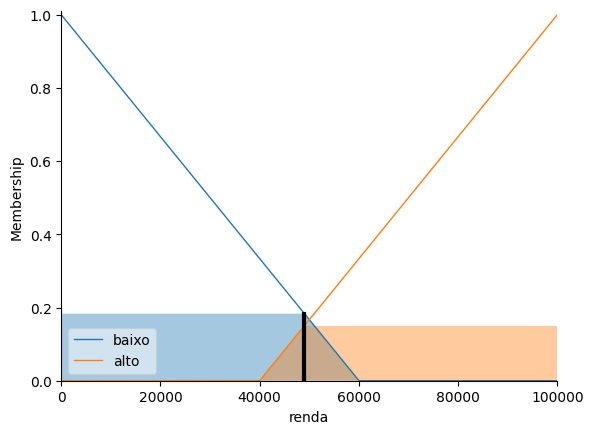

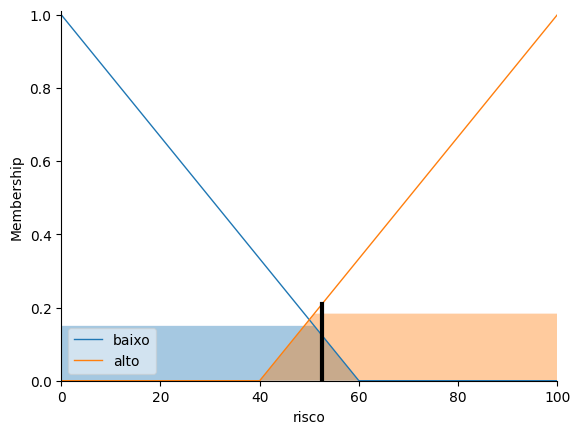

In [35]:
renda = ctrl.Antecedent(np.arange(0, 100001, 1) ,'renda')
risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

renda['baixo'] = fuzz.trimf(renda.universe, [0, 0, 60000])
renda['alto'] = fuzz.trimf(renda.universe, [40000, 100000, 100000])

risco['baixo'] = fuzz.trimf(risco.universe, [0, 0, 60])
risco['alto'] = fuzz.trimf(risco.universe, [40, 100, 100])

                      #se renda baixa -> risco alto
regrariscoalto = ctrl.Rule(renda['baixo'], risco['alto'])

# se rrenda alta -> risco baixo
regrariscobaixo = ctrl.Rule(renda['alto'], risco['baixo'])


risco_ctrl = ctrl.ControlSystem([regrariscoalto, regrariscobaixo])
risco_sim = ctrl.ControlSystemSimulation(risco_ctrl)


risco_sim.input['renda'] = 49000
risco_sim.compute()

print(risco_sim.output['risco'])

renda.view(sim=risco_sim)
risco.view(sim=risco_sim)

48.26623345367025


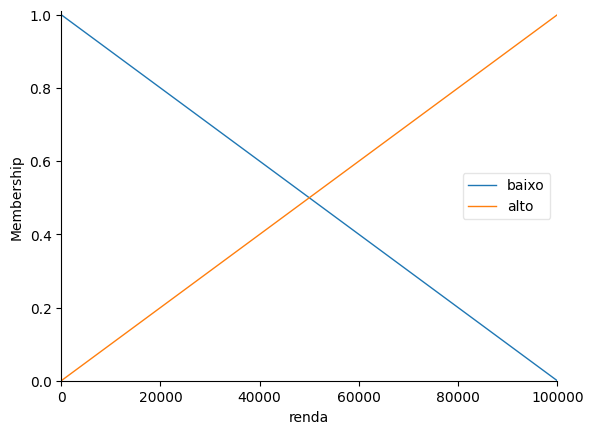

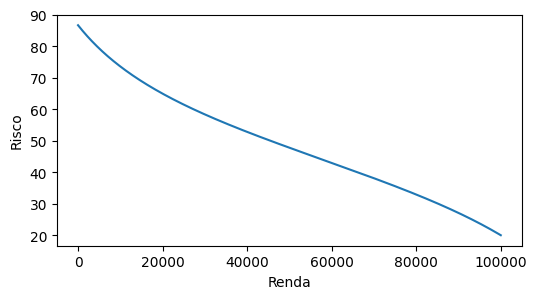

In [39]:
renda = ctrl.Antecedent(np.arange(0, 100001, 1) ,'renda')
risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

renda['baixo'] = fuzz.trimf(renda.universe, [0, 0, 100000])
renda['alto'] = fuzz.trimf(renda.universe, [0, 100000, 100000])

renda.view()

risco['baixo'] = fuzz.trimf(risco.universe, [0, 0, 60])
risco['alto'] = fuzz.trimf(risco.universe, [60, 100, 100])

                      #se renda baixa -> risco alto
regrariscoalto = ctrl.Rule(renda['baixo'], risco['alto'])

# se rrenda alta -> risco baixo
regrariscobaixo = ctrl.Rule(renda['alto'], risco['baixo'])


risco_ctrl = ctrl.ControlSystem([regrariscoalto, regrariscobaixo])
risco_sim = ctrl.ControlSystemSimulation(risco_ctrl)


risco_sim.input['renda'] = 49000
risco_sim.compute()

print(risco_sim.output['risco'])


rendas_val= np.arange(0,100001,100)

previsoesderisco= []

for rendax in rendas_val:
  risco_sim.input['renda'] = rendax
  risco_sim.compute()
  previsoesderisco.append(risco_sim.output['risco'])

plt.figure(figsize=(6,3))

plt.plot(rendas_val, previsoesderisco)
plt.xlabel("Renda")
plt.ylabel("Risco")
plt.show()

In [41]:
def cart_step(estado, F, params, dt):

  x, x_dot, theta, theta_dot = estado

  g = params['g']
  mc =params['mc']
  mp = params['mp']
  l = params['l']

  sin_t = np.sin(theta)
  cos_t = np.cos(theta)
  mt = mp+mc

  temp = (F + mp*l*theta_dot**2*sin_t)/mt

  theta_dot_dot = mt*(g*sin_t - temp)/(l*(4/3 - mp*(9/4)*cos_t**2))
  x_dot_dot = temp - (mp*l*theta_dot**2*cos_t)/mt

  x_dot = x_dot + x_dot_dot*dt
  x = x + x_dot*dt

  theta_dot = theta_dot + theta_dot_dot*dt
  theta = theta + theta_dot*dt

  return np.array([x, x_dot, theta, theta_dot])


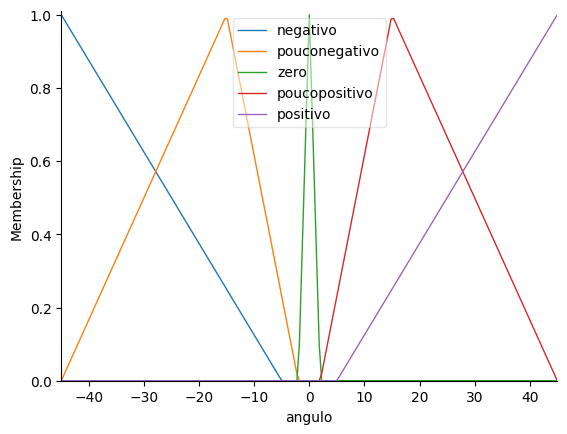

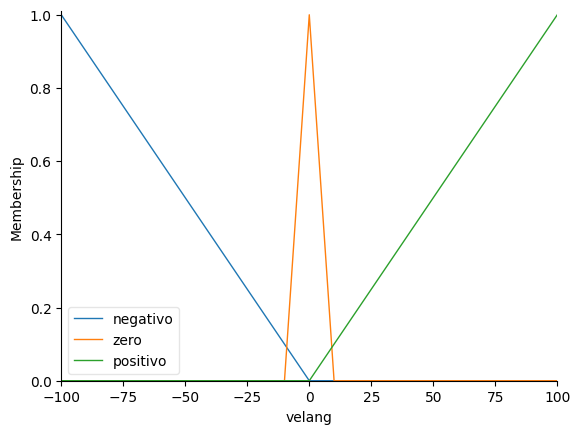

In [44]:
angulo = ctrl.Antecedent(np.linspace(-45,45,201),'angulo')
velang = ctrl.Antecedent(np.linspace(-100,100,201),'velang')

forca = ctrl.Consequent(np.linspace(-200,200,401),'forca')

angulo['negativo'] = fuzz.trimf(angulo.universe, [-45, -45, -5])
angulo['pouconegativo']= fuzz.trimf(angulo.universe, [-45, -15, -2])
angulo['zero']= fuzz.trimf(angulo.universe, [-2, 0, 2])
angulo['poucopositivo']= fuzz.trimf(angulo.universe, [2, 15, 45])
angulo['positivo'] = fuzz.trimf(angulo.universe, [5, 45, 45])

angulo.view()

velang['negativo'] = fuzz.trimf(velang.universe, [-100, -100, -0])
velang['zero'] = fuzz.trimf(velang.universe, [-10,0,10] )
velang['positivo'] = fuzz.trimf(velang.universe, [0,100,100])

velang.view()

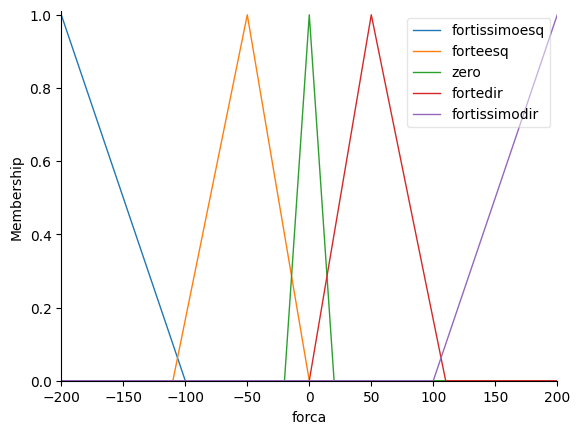

In [45]:
forca['fortissimoesq']=  fuzz.trimf(forca.universe, [-200, -200, -100])
forca['forteesq']= fuzz.trimf(forca.universe,[-110,-50,0])
forca['zero'] = fuzz.trimf(forca.universe,[-20,0,20])
forca['fortedir'] = fuzz.trimf(forca.universe,[0,50,110])
forca['fortissimodir'] = fuzz.trimf(forca.universe,[100,200,200])

forca.view()

In [49]:
regras = [
    ctrl.Rule(angulo['negativo'] & velang['negativo'], forca['fortissimoesq']),
    ctrl.Rule(angulo['negativo'] & velang['zero'], forca['fortissimoesq']),
    ctrl.Rule(angulo['negativo'] & velang['positivo'], forca['forteesq']),

    ctrl.Rule(angulo['pouconegativo'] & velang['negativo'], forca['fortissimoesq']),
    ctrl.Rule(angulo['pouconegativo'] & velang['zero'], forca['forteesq']),
    ctrl.Rule(angulo['pouconegativo'] & velang['positivo'], forca['zero']),

    ctrl.Rule(angulo['zero'] & velang['negativo'], forca['forteesq']),
    ctrl.Rule(angulo['zero'] & velang['zero'], forca['zero']),
    ctrl.Rule(angulo['zero'] & velang['positivo'], forca['fortedir']),

    ctrl.Rule(angulo['poucopositivo'] & velang['negativo'], forca['zero']),
    ctrl.Rule(angulo['poucopositivo'] & velang['zero'], forca['fortedir']),
    ctrl.Rule(angulo['poucopositivo'] & velang['positivo'], forca['fortissimodir']),

    ctrl.Rule(angulo['positivo'] & velang['negativo'], forca['fortedir']),
    ctrl.Rule(angulo['positivo'] & velang['zero'], forca['fortissimodir']),
    ctrl.Rule(angulo['positivo'] & velang['positivo'], forca['fortissimodir'])
]

controlador = ctrl.ControlSystem(regras)
simulador = ctrl.ControlSystemSimulation(controlador)

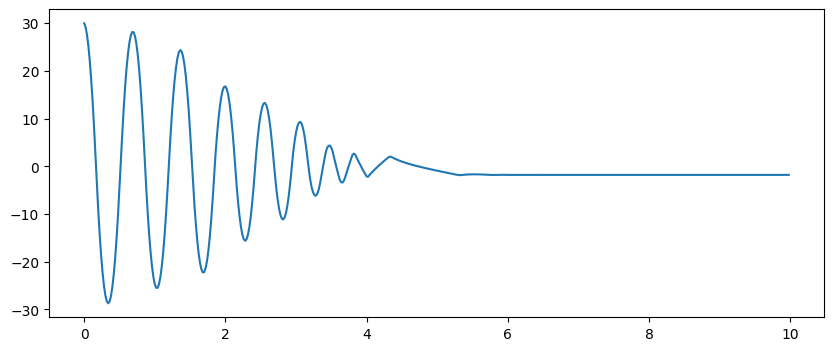

In [58]:
params = {'g': 9.81, 'mc':1.0, 'mp': 0.1, 'l':2.5}

dt=0.02

T=10.0

steps= int(T/dt)

theta0= np.deg2rad(30)

estado = np.array([0.0, 0.0, theta0, 0.0])

historico = {'t':[], 'x':[], 'x_dot':[], 'theta':[], 'theta_dot':[], 'force': []}

for k in range(steps):
  t = k*dt
  x ,x_dot, theta, theta_dot = estado
  theta_deg = np.rad2deg(theta)

  simulador.input['angulo'] = theta_deg
  simulador.input['velang'] = theta_dot
  simulador.compute()

  F = float(simulador.output['forca'])

  estado = cart_step(estado, F, params, dt)

  historico['t'].append(t)
  historico['x'].append(x)
  historico['x_dot'].append(x_dot)
  historico['theta'].append(np.rad2deg(theta))
  historico['theta_dot'].append(theta_dot)
  historico['force'].append(F)

t= np.array(historico['t'])


plt.figure(figsize=(10,4))

plt.plot(t, historico['theta'], label="theta")
#plt.plot(t, historico['theta_dot'], label="theta_dot")